In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

ModuleNotFoundError: No module named 'pandas'

https://chat.openai.com/share/11bc30d3-8c9b-42c4-af10-cbc7567e9b4c

In [ ]:
sco_books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
sco_books.sample(5)

,uri,title,author,editor,translator,introduction,illustrator,photographer,year,format,uncertain,ebook_url,volumes_issues,notes,event_count,borrow_count,purchase_count,circulation_years,updated
2858,https://shakespeareandco.princeton.edu/books/f...,Recollections of the Irish War,"Figgis, Darrell",NaN,NaN,NaN,NaN,NaN,1927,Book,False,https://archive.org/details/recollectionsofi00...,NaN,NaN,1,1,0,1928,2021-11-08T13:54:52.340916+00:00
5132,https://shakespeareandco.princeton.edu/books/o...,Coming Up for Air,"Orwell, George",NaN,NaN,NaN,NaN,NaN,1939,Book,False,https://archive.org/details/in.ernet.dli.2015....,NaN,NaN,8,8,0,1944;1945;1939;1941,2021-04-18T18:24:36+00:00
4993,https://shakespeareandco.princeton.edu/books/w...,Life along the Passaic River,"Williams, William Carlos",NaN,NaN,NaN,NaN,NaN,1938,Book,False,NaN,NaN,NaN,3,3,0,1939,2020-04-30T19:40:21+00:00
1527,https://shakespeareandco.princeton.edu/books/b...,Psycho-Analysis and Its Place in Life,"Bradby, M. K.",NaN,NaN,NaN,NaN,NaN,1919,Book,False,https://archive.org/details/psychoanalysisit00...,NaN,NaN,6,6,0,1920;1921;1922;1926;1934,2021-11-09T00:48:09.919754+00:00
3598,https://shakespeareandco.princeton.edu/books/d...,Challenge to Clarissa,"Delafield, E. M.",NaN,NaN,NaN,NaN,NaN,1931,Book,False,NaN,NaN,NaN,3,3,0,1936;1931,2020-04-30T19:40:19+00:00


In [ ]:
ban_books = pd.read_csv('../data/banned_books.csv', encoding='utf-8', dtype={'date_banned': 'Int32'})
ban_books.sample(5)

,title,author,viaf_url,country,date_banned,source,note
38,Sister Carrie,"Dreiser, Theodore",http://viaf.org/viaf/4944366,USA,1900,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,Withdrawn and revised
63,Elmer Gantry,"Lewis, Sinclair",http://viaf.org/viaf/39380311,Ireland,1929,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,NaN
170,I'll Never Be Young Again,"Du Maurier, Daphne",http://viaf.org/viaf/24600806,Ireland,1942,https://sites.nd.edu/irish-hesburgh/censorship/,NaN
165,The House of Gold,"O'Flaherty, Liam",http://viaf.org/viaf/110057173,Ireland,1930,https://sites.nd.edu/irish-hesburgh/censorship/,NaN
126,The Autobiography of Benjamin Franklin,"Franklin, Benjamin",http://viaf.org/viaf/56609913,USA,1957,https://archive.org/details/literaturesuppre00...,Roth v United States


In [ ]:
ban_books.columns

Index(['title', 'author', 'viaf_url', 'country', 'date_banned', 'source',
       'note'],
      dtype='object')

In [ ]:
ban_books.shape

(251, 7)

In [ ]:
ban_books_aut = ban_books[['author']]
ban_books_aut.rename(columns={'author':'ban_author'}, inplace=True)
ban_books_aut

C:\Users\dittm\AppData\Local\Temp\ipykernel_6244\3768331347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ban_books_aut.rename(columns={'author':'ban_author'}, inplace=True)


,ban_author
0,Aristophanes
1,Ovid
2,"Apuleius, Lucius"
3,"Shakespeare, William"
4,"Shakespeare, William"
...,...
246,"Lofting, Hugh"
247,"Dos Passos, John"
248,"Aragon, Louis"
249,"Stalin, Joseph"


In [ ]:
ban_books_aut_unique = ban_books_aut.drop_duplicates()
ban_books_aut_unique.sample(10)

,ban_author
157,"Clarke, Austin"
2,"Apuleius, Lucius"
155,"Crane, Stephen"
175,"Spender, Stephen"
169,"Cronin, A. J."
207,"James, Norah C."
163,"O'Connor, Frank"
102,"Rousseau, Jean-Jacques"
67,"Clarke, Donald Henderson"
174,"Proust, Marcel"


In [ ]:
ban_books_aut_unique.shape

(182, 1)

In [ ]:
sco_books_aut = sco_books[sco_books['format'] == 'Book'][['author', 'title', 'format', 'year', 'borrow_count']].dropna()
sco_books_aut.rename(columns={'author':'sco_author'}, inplace=True)
sco_books_aut = sco_books_aut[~sco_books_aut['sco_author'].str.contains(';')] # ~ negates condition
sco_books_aut = sco_books_aut[(sco_books_aut['year'] >= 1919) & (sco_books_aut['year'] <= 1941)] # book published between 1919 and 1941
# sco_books_aut = sco_books_aut[(sco_books_aut['borrow_count'] >= 0)]
sco_books_aut.shape

(3512, 5)

In [ ]:
sco_books_aut.columns

Index(['sco_author', 'title', 'format', 'year', 'borrow_count'], dtype='object')

In [ ]:
sco_books_aut.sample(10)

,sco_author,title,format,year,borrow_count
2680,"Coates, Robert Myron",The Eater of Darkness,Book,1926,1
3367,"Lewinsohn, Richard",The Mystery Man of Europe: Sir Basil Zaharoff,Book,1929,1
3698,"Faulkner, William",The Hamlet,Book,1931,2
1775,"Moore, Marianne",Poems,Book,1921,4
4322,"Adams, Herbert",The Knife,Book,1934,2
2984,"Huddleston, Sisley",Articles de Paris,Book,1928,1
2787,"Gorky, Maxim",Decadence,Book,1927,2
2632,"Locke, William John",Perella,Book,1926,2
4222,"Forster, E. M.",Goldsworthy Lowes Dickinson,Book,1934,11
1572,"Richardson, Dorothy M.",The Tunnel (Pilgrimage 4),Book,1919,24


Check how many books per author are in the dataset

In [ ]:
sco_filter = sco_books_aut.loc[sco_books_aut['sco_author'] == 'Hemingway, Ernest']
sco_filter

,sco_author,title,format,year,borrow_count
2140,"Hemingway, Ernest",Three Stories and Ten Poems,Book,1923,1
2731,"Hemingway, Ernest",The Sun Also Rises,Book,1926,27
2735,"Hemingway, Ernest",The Torrents of Spring,Book,1926,2
2826,"Hemingway, Ernest",Men without Women,Book,1927,26
3216,"Hemingway, Ernest",A Farewell to Arms,Book,1929,25
3780,"Hemingway, Ernest",Death in the Afternoon,Book,1932,22
4160,"Hemingway, Ernest",Winner Take Nothing,Book,1933,20
4418,"Hemingway, Ernest",Green Hills of Africa,Book,1935,8
4927,"Hemingway, Ernest",To Have and Have Not,Book,1937,23
5061,"Hemingway, Ernest",The Fifth Column and the First Forty-Nine Stories,Book,1938,14


In [ ]:
merged_df = pd.merge(ban_books_aut_unique, sco_books_aut, how='inner', left_on='ban_author', right_on='sco_author')

intersection_df = merged_df[~(merged_df['ban_author'].isna() | merged_df['sco_author'].isna())]
intersection_df.reset_index(drop=True, inplace=True)

intersection_df = intersection_df[['sco_author', 'ban_author']]

intersection_df.shape

(696, 2)

In [ ]:
intersection_df.head(10)

,sco_author,ban_author
0,"Shakespeare, William","Shakespeare, William"
1,"Shakespeare, William","Shakespeare, William"
2,"Andersen, Hans Christian","Andersen, Hans Christian"
3,"Whitman, Walt","Whitman, Walt"
4,"Baudelaire, Charles","Baudelaire, Charles"
5,"Tolstoy, Leo","Tolstoy, Leo"
6,"Tolstoy, Leo","Tolstoy, Leo"
7,"Twain, Mark","Twain, Mark"
8,"Twain, Mark","Twain, Mark"
9,"Swinburne, Algernon Charles","Swinburne, Algernon Charles"


Top banned authors per books

In [ ]:
duplicate_counts = intersection_df.groupby(['sco_author', 'ban_author']).size()

sorted_duplicate_counts = duplicate_counts.sort_values(ascending=False)

top_20_duplicates = sorted_duplicate_counts.head(20)


Top authors per books

In [ ]:
total_books = sco_books_aut.groupby(['sco_author']).size()

sorted_total_books = total_books.sort_values(ascending=False)

top_20_total_duplicates = sorted_total_books.head(20)

top_20_total_duplicates


sco_author
Lawrence, D. H.           34
Walpole, Hugh             26
Huxley, Aldous            25
Wells, H. G.              23
Mackenzie, Compton        22
Maugham, W. Somerset      21
Galsworthy, John          20
Eliot, T. S.              20
Fletcher, Joseph Smith    20
Yeats, William Butler     19
Woolf, Virginia           17
Bennett, Arnold           16
Russell, Bertrand         16
Christie, Agatha          16
Wodehouse, P. G.          16
Kaye-Smith, Sheila        15
Stern, G. B.              15
Chesterton, G. K.         15
Young, Francis Brett      15
Ford, Ford Madox          14
dtype: int64

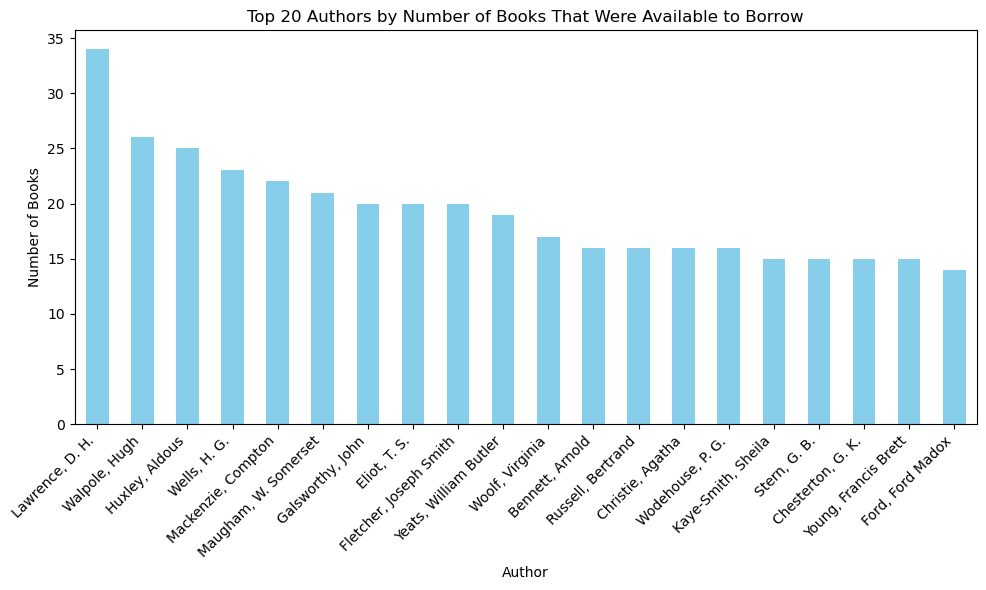

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_20_total_duplicates.plot(kind='bar', color='skyblue')
plt.title('Top 20 Authors by Number of Books That Were Available to Borrow')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


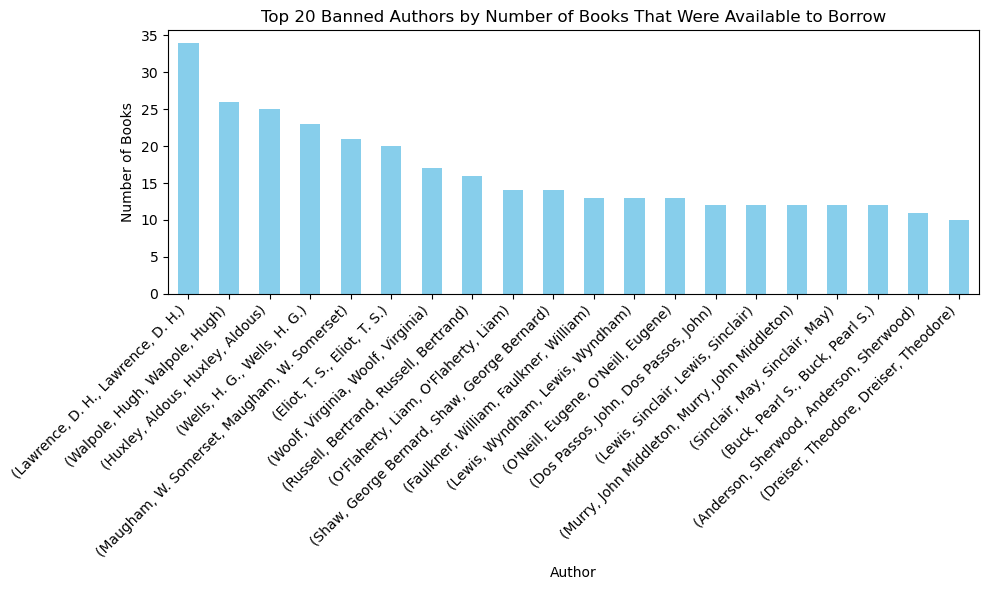

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_20_duplicates.plot(kind='bar', color='skyblue')
plt.title('Top 20 Banned Authors by Number of Books That Were Available to Borrow')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Ratio of banned authors within the first dataset: 0.19817767653758542


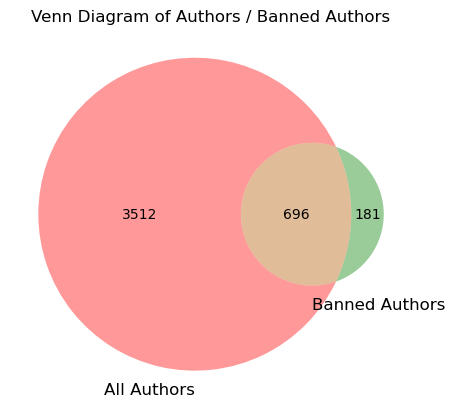

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Count occurrences of each author in both datasets
sco_authors_count = sco_books_aut['sco_author'].value_counts()
ban_authors_count = ban_books_aut_unique['ban_author'].value_counts()

# Find authors whose works were banned within the first dataset
banned_authors_in_dataset1 = set(sco_authors_count.index).intersection(set(ban_authors_count.index))

# Calculate the total count of authors in dataset 1
total_authors_in_dataset1 = sum(sco_authors_count)

# Calculate the total count of banned authors in dataset 1
total_banned_authors_in_dataset1 = sum(sco_authors_count[author] for author in banned_authors_in_dataset1)

# Calculate the ratio of banned authors within the first dataset
ratio_banned_authors = total_banned_authors_in_dataset1 / total_authors_in_dataset1

print("Ratio of banned authors within the first dataset:", ratio_banned_authors)

venn2(subsets=(total_authors_in_dataset1, len(ban_authors_count), total_banned_authors_in_dataset1), 
      set_labels=('All Authors', 'Banned Authors'))

plt.title('Venn Diagram of Authors / Banned Authors')
plt.show()